In [6]:
import os
import numpy
import random
import matplotlib
import matplotlib.pyplot as plt

WORK_SPACE = os.getcwd()

PIXEL_PAIRS_MAX = 300
# southern earth
MONTH_LABEL = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


def display_pts_b3_b4(sr_list, slope_list, r_list, rmse_list, match_type):
    plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.grid(linestyle='--', linewidth=0.3)
#     ax.set_title(match_type + '-matches', loc='left', fontstyle='oblique', fontsize='medium')

    color_s = ['#FF4500', '#8B0000']
    # no-data mask
    f_temp = slope_list[0]
    f_temp = numpy.insert(f_temp, [0, len(f_temp)], [f_temp[-1:], f_temp[0]])
    if match_type == 'RAA':
        for sr_idx in range(len(f_temp)):
            if f_temp[sr_idx] <= 0:
                ax.axvline(sr_idx, color='whitesmoke', linewidth=50.0)
    # display values
    band_labels = ['Band3', 'Band4']
    sr_med = []
    plt_hs = []
    for idx in range(len(band_labels)):
        band_label = band_labels[idx]
        
        sr_month = sr_list[idx]
                
        sr_month_1d = numpy.array([numpy.median(sr_month[sr_idx]) for sr_idx in range(len(sr_month))])
        sr_month_1d[sr_month_1d <= 0] = numpy.nan
        sr_month_1d = numpy.insert(sr_month_1d, [0, len(sr_month_1d)], [sr_month_1d[-1:], sr_month_1d[0]])
#         ax.plot([i for i in range(0,14,1)], sr_month_1d, '--', color=color_s[idx], label=band_label + '_LSR', linewidth=0.5)
        sr_med.append(sr_month_1d)
        sr_month[sr_month <= 0] = numpy.nan
        
        slope_month = slope_list[idx]
        slope_month[slope_month <= 0] = numpy.nan
        r_month = r_list[idx]
        r_month[r_month <= 0] = numpy.nan
        rmse_month = rmse_list[idx]
        rmse_month[rmse_month <= 0] = numpy.nan
        
        ax.boxplot(sr_month.T,
                   patch_artist=True,
                    showfliers=False,
                    boxprops=dict(facecolor=color_s[idx],color=color_s[idx], linewidth=0.5, alpha=0.2),
                    medianprops=dict(color=color_s[idx], linewidth=1),
                    whiskerprops=dict(color=color_s[idx], linewidth=0.5, alpha=0.3), capprops=dict(color=color_s[idx], linewidth=0.5, alpha=0.3))
#         plt_hs.append(a)
        b, = ax.plot([i for i in range(1,13,1)], slope_month, '_', color=color_s[idx], label=band_label + '_Slope', markersize=8)
        c, = ax.plot([i for i in range(1,13,1)], r_month, '1', color=color_s[idx], label=band_label + '_r', markersize=8)
        d, = ax.plot([i for i in range(1,13,1)], rmse_month, 'x', color=color_s[idx], label=band_label + '_RMSE', markersize=5)
        plt_hs.append(b)
        plt_hs.append(c)
        plt_hs.append(d)
        
    # NDVI
    NDVI_mon = numpy.zeros(14,)    
    print(len(sr_med[0]))
    for mon_sr_idx in range(len(sr_med[0])):
        mon_b3 = sr_med[0][mon_sr_idx]
        mon_b4 = sr_med[1][mon_sr_idx]
        if numpy.isnan(mon_b3) or numpy.isnan(mon_b4):
            NDVI_mon[mon_sr_idx] = numpy.NaN
        else:
            NDVI_mon[mon_sr_idx] = (mon_b4-mon_b3)/(mon_b4+mon_b3)
    ndvi_h, =ax.plot([i for i in range(0,14,1)], NDVI_mon, '.', color='g', label='NDVI', markersize=8)

#     NDVI_mon = numpy.zeros(12,)
#     for mon_sr_idx in range(12):
#         ndvi_m = []
#         sr_b3 = sr_list[0][mon_sr_idx]
#         sr_b4 = sr_list[1][mon_sr_idx]
#         if len(sr_b3)>0:
#             for sr_m_idx in range(len(sr_b3)):
#                 mon_b3 = sr_b3[sr_m_idx]
#                 mon_b4 = sr_b4[sr_m_idx]
#                 ndvi_t = (mon_b4-mon_b3)/(mon_b4+mon_b3)
#                 ndvi_m.append(ndvi_t)
#             NDVI_mon[mon_sr_idx] = numpy.array(ndvi_m).mean()
#         else:
#             NDVI_mon[mon_sr_idx] = numpy.NaN                
#     ndvi_h, =ax.plot([i for i in range(1,13,1)], NDVI_mon, '.', color='g', label='NDVI', markersize=8)

    ax.minorticks_on()
    x_minor_locator = plt.MultipleLocator(1)
    x_major_locator = plt.MultipleLocator(1)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.xaxis.set_major_locator(x_major_locator)
    y_minor_locator = plt.MultipleLocator(0.1)
    y_major_locator = plt.MultipleLocator(0.1)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.yaxis.set_major_locator(y_major_locator)

    ax.tick_params(axis="x", which='minor', length=5, direction='out', labelsize=12)
    ax.tick_params(axis="x", which='major', length=5, direction='out', labelsize=12)
    ax.tick_params(axis="y", which='minor', length=5, direction='in', labelsize=12)
    ax.tick_params(axis="y", which='major', length=5, direction='in', labelsize=12)

    plt.xticks([i for i in range(1, 13, 1)], MONTH_LABEL)
    plt.xlim((0.5, 12.5))
    plt.ylim((0.0, 1.08))
    plt.xlabel('Month', size=14)
    plt.ylabel('AHI-MISR LSR, Slope, r & RMSE', size=14)
    first_legend = ax.legend(handles=plt_hs, markerscale=0.5, loc=8, bbox_to_anchor=[0.5, 0.50], ncol=2)
    ax.add_artist(first_legend)
    ax.legend(handles=[ndvi_h], markerscale=0.5, loc=9, bbox_to_anchor=[0.5, 0.50], ncol=2)
    
#     plt.savefig(WORK_SPACE + '/VZA26_' + match_type + '_month_NDVI.png', dpi=600)
    plt.show()
    plt.clf()


def show_para(mon_para, match_type):
    sr_list = numpy.array(mon_para['sr_list'])
    slope_list = numpy.array(mon_para['slope_list'])
    r_list = numpy.array(mon_para['r_list'])
    rmse_list = numpy.array(mon_para['rmse_list'])
    sr_b3 = sr_list[0]
    sr_b4 = sr_list[1]
    display_pts_b3_b4(mon_para['sr_list'], mon_para['slope_list'], mon_para['r_list'], mon_para['rmse_list'], match_type)
    
#     sr_w2w = [numpy.append(sr_b3[6:, :], sr_b3[:6, :],axis=0),numpy.append(sr_b4[6:, :], sr_b4[:6, :],axis=0)]
#     slope_w2w = numpy.hstack((slope_list[:, 6:], slope_list[:, :6]))
#     r_w2w = numpy.hstack((r_list[:, 6:], r_list[:, :6]))
#     rmse_w2w = numpy.hstack((rmse_list[:, 6:], rmse_list[:, :6]))
    
#     display_pts_b3_b4(sr_w2w, slope_w2w, r_w2w, rmse_w2w, match_type)

14


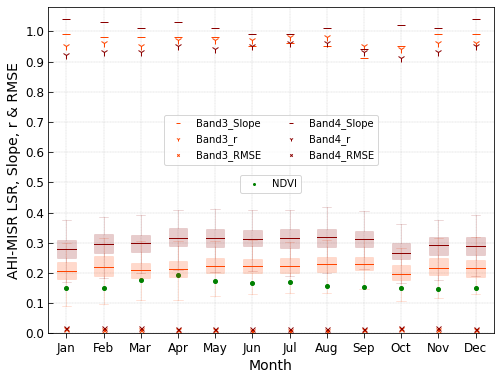

<Figure size 432x288 with 0 Axes>

In [5]:
## LC = 7
raa_month_para_npy = os.path.join(WORK_SPACE, '26_Ray_sr_slope_r_rmse_offset.npy')
raa_month_para = numpy.load(raa_month_para_npy, allow_pickle=True)[0]
show_para(raa_month_para, 'Ray')